In [14]:
import csv
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

In [15]:
df_interaction = pd.read_csv("RAW_interactions.csv")
df_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [16]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
user_id      1132367 non-null int64
recipe_id    1132367 non-null int64
date         1132367 non-null object
rating       1132367 non-null int64
review       1132198 non-null object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [17]:
df_interaction['date'] = pd.to_datetime(df_interaction['date'])
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
user_id      1132367 non-null int64
recipe_id    1132367 non-null int64
date         1132367 non-null datetime64[ns]
rating       1132367 non-null int64
review       1132198 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 43.2+ MB


In [18]:
avg_interact = df_interaction.loc[:,"user_id"].mean()
avg_interact

138429067.4306519

In [19]:
df_interaction.sort_values(by='date', inplace=True, ascending=False)
df_interaction.head(10)

,user_id,recipe_id,date,rating,review
982325,2002372706,63786,2018-12-20,5,Finally I found a no nonsense fajita recipe
584485,2001402443,271337,2018-12-19,3,These took quite a long time to make and thoug...
953118,2002371627,153647,2018-12-19,0,Best thing about this recipe? I didn't have to...
480595,2002371755,393600,2018-12-19,5,Healthiest and tastiest by far. I do a few twe...
809003,2002328086,28148,2018-12-19,4,These were good but I tweaked them to give the...
651974,2002024198,11763,2018-12-19,5,This a lovely simple and light lemon loaf reci...
617619,2002371843,516662,2018-12-19,5,This cake is incredible tasting and easy to ma...
139134,2000498330,314535,2018-12-19,5,"Delicious, brightly colored. A fun and tasty r..."
1110432,2002178501,51803,2018-12-19,5,Omg this was the bomb!!! Only thing i did diff...
891582,2002367969,149257,2018-12-19,5,Made a double batch of this recipe. My grandda...


In [20]:
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
df_interaction.head(3500)

,user_id,recipe_id,date,rating,review
982325,2002372706,63786,2018-12-20,5,Finally I found a no nonsense fajita recipe
584485,2001402443,271337,2018-12-19,3,These took quite a long time to make and thoug...
953118,2002371627,153647,2018-12-19,0,Best thing about this recipe? I didn't have to...
480595,2002371755,393600,2018-12-19,5,Healthiest and tastiest by far. I do a few twe...
809003,2002328086,28148,2018-12-19,4,These were good but I tweaked them to give the...
651974,2002024198,11763,2018-12-19,5,This a lovely simple and light lemon loaf reci...
617619,2002371843,516662,2018-12-19,5,This cake is incredible tasting and easy to ma...
139134,2000498330,314535,2018-12-19,5,"Delicious, brightly colored. A fun and tasty r..."
1110432,2002178501,51803,2018-12-19,5,Omg this was the bomb!!! Only thing i did diff...
891582,2002367969,149257,2018-12-19,5,Made a double batch of this recipe. My grandda...


In [32]:
mask = (df_interaction['date'] >= '9/20/2018') & (df_interaction['date'] <= '12/20/2018')
df_daterange = df_interaction.loc[mask]
df_daterange.head()

,user_id,recipe_id,date,rating,review
982325,2002372706,63786,2018-12-20,5,Finally I found a no nonsense fajita recipe
584485,2001402443,271337,2018-12-19,3,These took quite a long time to make and thoug...
953118,2002371627,153647,2018-12-19,0,Best thing about this recipe? I didn't have to...
480595,2002371755,393600,2018-12-19,5,Healthiest and tastiest by far. I do a few twe...
809003,2002328086,28148,2018-12-19,4,These were good but I tweaked them to give the...


In [ ]:
df_interaction.drop(['review'], axis=1)

In [41]:
df_interaction[mask].to_csv('daterange.csv', index=False)
df = pd.read_csv("daterange.csv")
df

,user_id,recipe_id,date,rating,review
0,2002372706,63786,2018-12-20,5,Finally I found a no nonsense fajita recipe
1,2001402443,271337,2018-12-19,3,These took quite a long time to make and thoug...
2,2002371627,153647,2018-12-19,0,Best thing about this recipe? I didn't have to...
3,2002371755,393600,2018-12-19,5,Healthiest and tastiest by far. I do a few twe...
4,2002328086,28148,2018-12-19,4,These were good but I tweaked them to give the...
5,2002024198,11763,2018-12-19,5,This a lovely simple and light lemon loaf reci...
6,2002371843,516662,2018-12-19,5,This cake is incredible tasting and easy to ma...
7,2000498330,314535,2018-12-19,5,"Delicious, brightly colored. A fun and tasty r..."
8,2002178501,51803,2018-12-19,5,Omg this was the bomb!!! Only thing i did diff...
9,2002367969,149257,2018-12-19,5,Made a double batch of this recipe. My grandda...


In [22]:
ttl_recipe_interact = df_daterange.loc[:,"recipe_id"].value_counts()
ttl_recipe_interact

2886      41
80156     22
60350     15
101954    13
339453    13
38298     13
39087     12
99476     12
22782     10
69173     10
63071      9
153642     8
97496      8
349246     8
486641     8
438883     8
205890     7
107786     7
137364     7
9054       7
27208      7
231701     6
262140     6
372087     6
139499     6
150384     6
54257      6
46877      6
272930     6
301754     6
36984      6
67256      5
131607     5
108231     5
133751     5
395966     5
1356       5
366948     5
21761      5
339905     5
149257     5
261889     5
165254     5
431399     5
67930      5
82945      5
330734     5
282620     5
17186      5
5170       5
14979      5
28768      4
227127     4
173017     4
31750      4
79506      4
129926     4
66409      4
89204      4
178370     4
496992     4
192346     4
266529     4
54351      4
187362     4
46780      4
118242     4
40497      4
100727     4
303245     4
92095      4
9272       4
123316     4
71849      4
42780      4
145038     4
358622     4

In [31]:
top_recipe = df_daterange.loc[df_daterange['recipe_id'] == 2886, ['recipe_id', 'date', 'rating', 'review'] ]
top_recipe

,recipe_id,date,rating,review
685032,2886,2018-12-19,5,I've been using this recipe for 2 years and it...
685030,2886,2018-12-14,5,"Best banana bread recipe I have ever made, and..."
685031,2886,2018-12-14,5,"Funny, &quot;Remove odd pots and pans from ove..."
685029,2886,2018-12-13,5,Very yummy. I added a little cinnamon to it as...
685028,2886,2018-12-12,4,I made this recipe today however I did some mi...
685027,2886,2018-12-11,5,My kids said this was the BEST banana bread I'...
685026,2886,2018-12-04,0,Wonderful Banana Bread! I've made it several t...
685025,2886,2018-12-02,5,Oh my goodness is this ever good! So easy to m...
685024,2886,2018-11-30,5,Delicious exactly as written... no tweaking ne...
685023,2886,2018-11-19,5,So amazing! This perfectly yielded 12 banana m...


In [24]:
ttl_interact_perday = df_daterange.loc[:,"date"].value_counts()
ttl_interact_perday

2018-10-28    76
2018-09-23    64
2018-10-21    63
2018-09-22    62
2018-10-23    60
2018-10-27    58
2018-10-01    57
2018-09-30    56
2018-10-08    55
2018-10-22    53
2018-10-07    53
2018-10-09    52
2018-11-22    52
2018-10-25    52
2018-10-10    50
2018-10-06    49
2018-10-16    49
2018-10-26    48
2018-10-29    48
2018-10-14    48
2018-10-12    48
2018-10-20    47
2018-10-18    46
2018-11-23    46
2018-09-25    46
2018-11-04    46
2018-09-24    45
2018-10-13    45
2018-09-20    45
2018-10-30    45
2018-10-19    43
2018-10-17    43
2018-12-16    43
2018-09-21    43
2018-11-06    41
2018-09-27    40
2018-10-31    39
2018-10-05    39
2018-09-29    39
2018-10-03    38
2018-10-11    38
2018-10-15    38
2018-10-24    37
2018-09-26    37
2018-10-04    36
2018-12-02    36
2018-10-02    35
2018-11-20    35
2018-11-21    35
2018-11-10    34
2018-11-19    34
2018-12-09    33
2018-11-05    33
2018-11-11    32
2018-09-28    32
2018-11-13    32
2018-12-04    32
2018-11-12    32
2018-12-01    

In [25]:
avg_interact_perday = ttl_interact_perday.mean()
avg_interact_perday

37.130434782608695

In [53]:
import plotly.express as px
df = pd.read_csv('daterange.csv')
fig = px.line(df, x = 'date', y = 'rating', title='User Interactions Over Time (2018)')
fig.show()

In [52]:
import plotly.express as px
df = pd.read_csv('daterange.csv')
fig = px.line(df, x = 'date', y = 'user_id', title='User Interactions Over Time (2018)')
fig.show()

In [42]:
df_recipes = pd.read_csv("RAW_recipes.csv")
df_recipes.head()

,name,id,minutes,contributor_id,submitted,...,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,...,11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,...,9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,...,6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,...,11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,...,5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [43]:
df_recipes['submitted'] = pd.to_datetime(df_recipes['submitted'])
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
name              231636 non-null object
id                231637 non-null int64
minutes           231637 non-null int64
contributor_id    231637 non-null int64
submitted         231637 non-null datetime64[ns]
tags              231637 non-null object
nutrition         231637 non-null object
n_steps           231637 non-null int64
steps             231637 non-null object
description       226658 non-null object
ingredients       231637 non-null object
n_ingredients     231637 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 21.2+ MB


In [44]:
mask = (df_recipes['submitted'] >= '9/20/2018') & (df_recipes['submitted'] <= '12/20/2018')
df_daterangerecipe = df_recipes.loc[mask]
df_daterangerecipe.head(100)

,name,id,minutes,contributor_id,submitted,...,n_steps,steps,description,ingredients,n_ingredients
1547,5 ingredient salted caramel crumble bars,537485,45,2000378667,2018-11-12,...,21,"['1', 'heat oven to 350f spray 8-inch square p...",delicious,"['pillsbury sugar cookie dough', 'caramel topp...",5
13104,bailey s chocotini,537459,10,400708,2018-11-10,...,5,"['to layer: add chocolate liqueur to glass', '...",a recipe that recipe complements the cocoa in ...,"['baileys irish cream', 'chocolate liqueur', '...",3
15158,baked shrimp and orzo with chickpeas lemon a...,537076,15,2002285039,2018-10-02,...,18,"['preheat oven to 450 degrees', 'dry shrimp wi...",shrimp and orzo make for a simple and flavorfu...,"['jumbo shrimp', 'salt & freshly ground black ...",15
34404,campbell s mini green bean casseroles,537323,40,33186,2018-10-25,...,11,"['heat the oven to 375&deg', 'f spray 16 muffi...","recipe courtesy of campbell's: ""here’s a fabul...","['cut green beans', ""campbell's cream of mushr...",6
36841,carrot apple zucchini bread,537241,65,400708,2018-10-18,...,21,"['bread:', 'preheat the oven to 350 degrees', ...",bread recipe is incredibly moist and flavorful...,"['unsalted butter', 'granulated sugar', 'eggs'...",21
57639,copycat chick fil a spicy deluxe chicken sandwich,537331,80,2002289981,2018-10-25,...,16,"['directions:', 'in a medium bowl whisk togeth...",if you love the spicy fried chicken this is yo...,"['pickle juice', 'whole milk', 'lemon juice', ...",21
86309,french onion baked potato soup,537071,35,2002285039,2018-10-02,...,17,"['place potatoes , broth , and 1 tablespoon sa...",meet the perfect mashup of two crowd-pleasing ...,"['yukon gold potatoes', 'low sodium chicken br...",13
89909,garlic and herb mashed potatoes,537458,42,400708,2018-11-10,...,12,['place potatoes and water to cover in a 6-qt'...,cream cheese is the secret ingredient in these...,"['yukon gold potatoes', 'cream cheese', 'butte...",11
89990,garlic baked brie spider,537037,45,33186,2018-09-26,...,14,"['slice a grid on top of a brie wheel', 'appro...","a creepy, crawly, cheesy arachnid appetizer. t...","['cheese wheel', 'garlic cloves', 'puff pastry...",12
111609,instant pot turkey chili,537073,80,2002285039,2018-10-02,...,16,"['preheat instant pot to saute setting', 'add ...",using dark meat turkey ensures a perfect chili.,"['olive oil', 'ground turkey', 'salt & freshly...",23


In [72]:
df_recipes[mask].to_csv('recipesdaterange.csv', index=False)
df_rdaterange = pd.read_csv("recipesdaterange.csv")
df_daterange = df_rdaterange.drop([19], axis=0, inplace=True)
df_daterange

In [76]:
table = table = pd.read_csv("recipesdaterange.csv")
table.head()

,name,id,minutes,contributor_id,submitted,...,n_steps,steps,description,ingredients,n_ingredients
0,5 ingredient salted caramel crumble bars,537485,45,2000378667,2018-11-12,...,21,"['1', 'heat oven to 350f spray 8-inch square p...",delicious,"['pillsbury sugar cookie dough', 'caramel topp...",5
1,bailey s chocotini,537459,10,400708,2018-11-10,...,5,"['to layer: add chocolate liqueur to glass', '...",a recipe that recipe complements the cocoa in ...,"['baileys irish cream', 'chocolate liqueur', '...",3
2,baked shrimp and orzo with chickpeas lemon a...,537076,15,2002285039,2018-10-02,...,18,"['preheat oven to 450 degrees', 'dry shrimp wi...",shrimp and orzo make for a simple and flavorfu...,"['jumbo shrimp', 'salt & freshly ground black ...",15
3,campbell s mini green bean casseroles,537323,40,33186,2018-10-25,...,11,"['heat the oven to 375&deg', 'f spray 16 muffi...","recipe courtesy of campbell's: ""here’s a fabul...","['cut green beans', ""campbell's cream of mushr...",6
4,carrot apple zucchini bread,537241,65,400708,2018-10-18,...,21,"['bread:', 'preheat the oven to 350 degrees', ...",bread recipe is incredibly moist and flavorful...,"['unsalted butter', 'granulated sugar', 'eggs'...",21


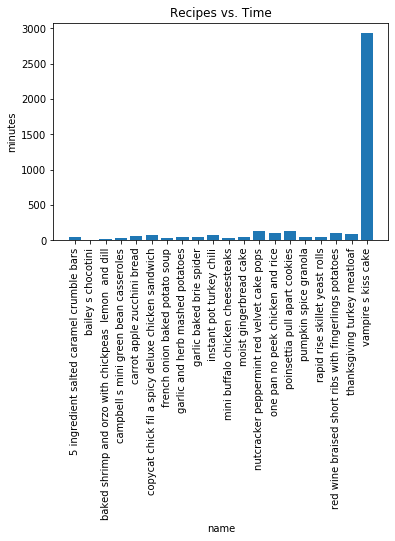

In [77]:
plt.bar(x=np.arange(1,21),height=table['minutes'])
plt.title("Recipes vs. Time")
plt.xticks(np.arange(1,21), table['name'], rotation=90)
plt.xlabel("name")
plt.ylabel("minutes")
plt.show()